In [3]:
pip install kaggle

In [4]:
!pip install opendatasets
!pip install pandas

In [22]:
import os
import requests
from pathlib import Path

google_drive_file_url = "https://drive.google.com/file/d/1Yl3F3i1no8vPuKHEr304nmG4owzy42yU/view?usp=sharing"


response = requests.get(google_drive_file_url)
with open("kaggle.json", "wb") as f:
    f.write(response.content)

KeyboardInterrupt: 

In [6]:
! cp kaggle.json /kaggle

! chmod 600 /kaggle/kaggle.json

! kaggle datasets download -d kaustubhb999/tomatoleaf

Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
 99% 177M/179M [00:08<00:00, 24.9MB/s]
100% 179M/179M [00:08<00:00, 21.8MB/s]


In [7]:
import zipfile
with zipfile.ZipFile('tomatoleaf.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')


In [23]:
# prompt: make a CNN to classify the dataset

import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Prepare the data
train_dir = os.path.join('/content/tomato/train')
validation_dir = os.path.join('/content/tomato/val')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)




Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [24]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Save the model
model.save('tomatoleaf_classifier.h5')

Epoch 1/10
313/313 [==============================] - 134s 418ms/step - loss: 1.3817 - accuracy: 0.5619 - val_loss: 1.2272 - val_accuracy: 0.5990
Epoch 2/10
313/313 [==============================] - 129s 411ms/step - loss: 0.6843 - accuracy: 0.7687 - val_loss: 1.0859 - val_accuracy: 0.6860
Epoch 3/10
313/313 [==============================] - 131s 419ms/step - loss: 0.5260 - accuracy: 0.8213 - val_loss: 0.9128 - val_accuracy: 0.7360
Epoch 4/10
313/313 [==============================] - 131s 417ms/step - loss: 0.3957 - accuracy: 0.8615 - val_loss: 0.7961 - val_accuracy: 0.7670
Epoch 5/10
313/313 [==============================] - 128s 409ms/step - loss: 0.3533 - accuracy: 0.8762 - val_loss: 0.7315 - val_accuracy: 0.7890
Epoch 6/10
313/313 [==============================] - 131s 420ms/step - loss: 0.2913 - accuracy: 0.8976 - val_loss: 1.5097 - val_accuracy: 0.7100
Epoch 7/10
313/313 [==============================] - 130s 414ms/step - loss: 0.2573 - accuracy: 0.9072 - val_loss: 0.7945 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
model.save('/content/tomatoleaf_classifier_trained.h5')

NameError: name 'model' is not defined

In [11]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the model to Google Drive
model.save('/content/drive/My Drive/tomatoleaf_classifier.h5')

Mounted at /content/drive


In [1]:
from google.colab import drive
from tensorflow.keras.models import load_model

# Mount Google Drive
drive.mount('/content/drive')

# Load the model from Google Drive
model_path = '/content/drive/My Drive/tomatoleaf_classifier.h5'
loaded_model = load_model(model_path)

Mounted at /content/drive


In [3]:
model = loaded_model

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the predictions for the training data
train_predictions = model.predict(validation_generator)

# Extract the predicted classes
y_pred_train = np.argmax(train_predictions, axis=-1)

# Extract the true classes
y_true_train = validation_generator.classes

# Get the class labels
class_labels = list(validation_generator.class_indices.keys())

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(y_true_train, y_pred_train)

# Print the confusion matrix
print("Confusion Matrix for Training Data:")
print(conf_matrix_train)

32/32 [==============================] - 3s 92ms/step
Confusion Matrix for Training Data:
[[ 88   7   1   0   0   1   1   2   0   0]
 [  1  80   4   0  11   0   1   3   0   0]
 [  1   6  81   3   6   1   1   0   0   1]
 [  0   1   2  69  17   0   0   0   9   2]
 [  1   0   1   1  92   0   0   1   2   2]
 [  0   0   0   0   0  79   3   0   7  11]
 [  0   2   0   0   2   8  38   0   2  48]
 [  4   2   0   0   0  10   1  82   1   0]
 [  0   0   0   0   6   0   2   0  83   9]
 [  0   0   0   0   0   0   0   0   0 100]]


In [ ]:
# import tensorflow as tf
# import numpy as np
# import requests
# from PIL import Image
# from io import BytesIO
# from tensorflow.keras.preprocessing import image
# import os

# # Load your trained model
# # model = tf.keras.models.load_model('tomatoleaf_classifier.h5')

# # Retrieve class names from the training dataset folders
# train_dir = '/content/tomato/train'  # Update this path if it's different
# class_names = sorted(os.listdir(train_dir))

# # Function to preprocess the image
# def preprocess_img(img):
#     img = img.resize((224, 224))
#     img = np.expand_dims(img, axis=0)
#     img = img / 255.0  # Normalize the image
#     return img

# # Function to classify image
# def classify_image(img):
#     img = preprocess_img(img)
#     preds = model.predict(img)
#     return preds

# # Function to classify image from URL
# def classify_image_from_url(url):
#     response = requests.get(url)
#     img = Image.open(BytesIO(response.content))
#     preds = classify_image(img)
#     return preds

# # Input URL of the image
# image_url = input("Enter URL of the image: ")

# # Classify the image from the URL
# prediction = classify_image_from_url(image_url)

# # Output the prediction
# predicted_class_index = np.argmax(prediction)
# predicted_class = class_names[predicted_class_index]
# confidence = prediction[0][predicted_class_index]

# print("Prediction:", predicted_class)
# print("Confidence:", confidence)


In [ ]:
if confidence < 0.5:
    # Find the indices of the top 3 predictions
    top_indices = np.argsort(prediction)[0][-3:][::-1]

    print("Low confidence in prediction. Top 3 predictions:")
    for idx in top_indices:
        print(class_names[idx], prediction[0][idx])
else:
    print("Prediction:", predicted_class)
    print("Confidence:", confidence)

In [5]:
model.save('/content/tomatoleaf_classifier_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


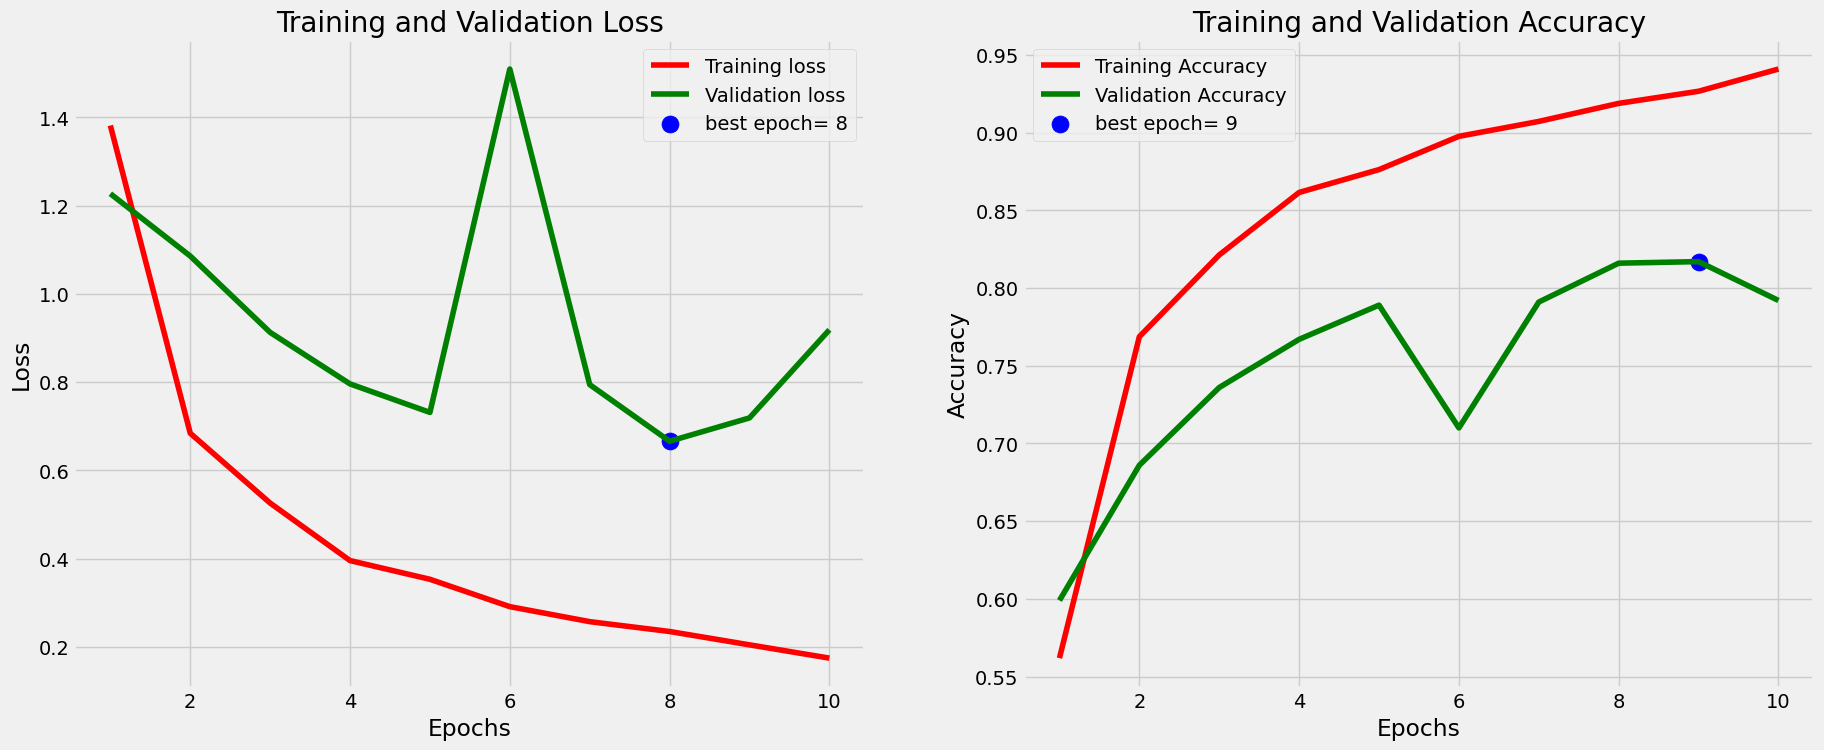

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    plt.show()

tr_plot(history,0)

32/32 [==============================] - 3s 89ms/step


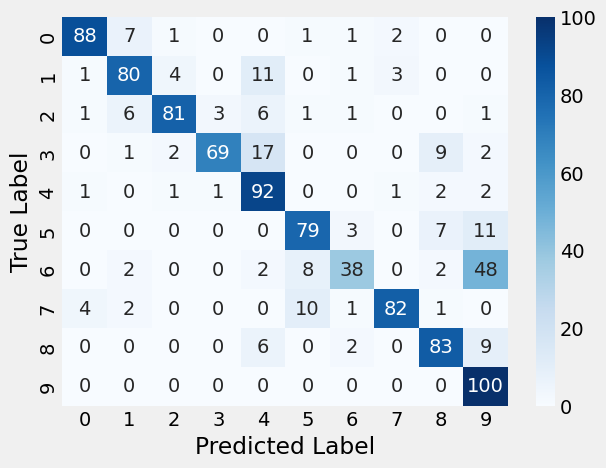

In [27]:
# prompt: output a confusion martix for my model

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = np.argmax(model.predict(validation_generator), axis=1)

# Get true labels
y_true = validation_generator.classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 [==============================] - 0s 51ms/step


ValueError: num must be an integer with 1 <= num <= 4, not 5

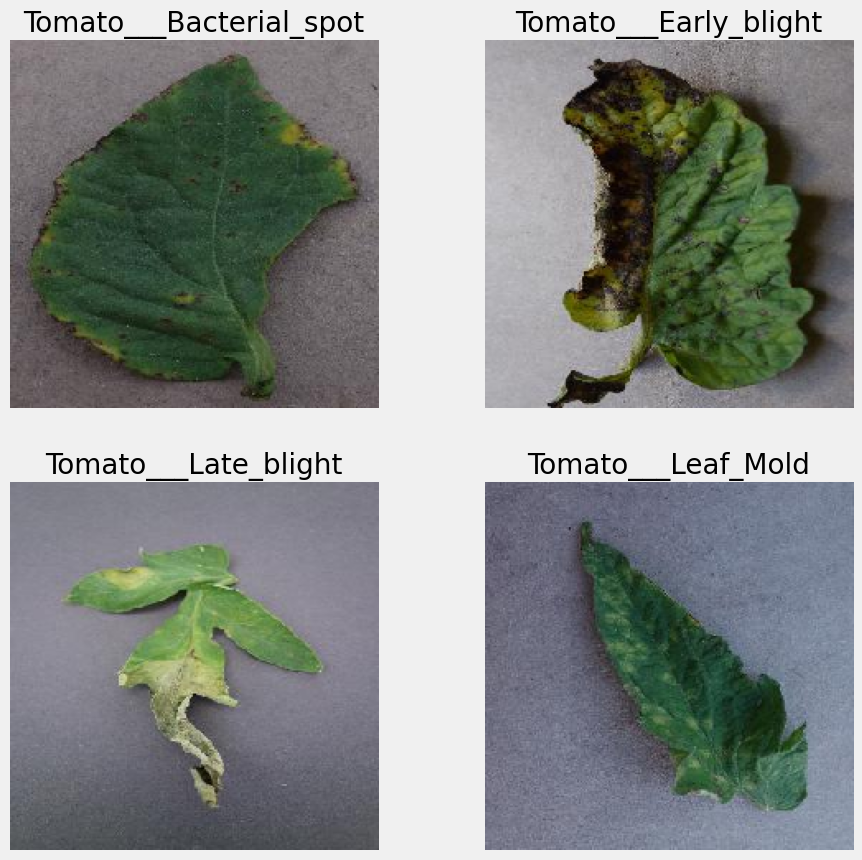

In [29]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the directory for validation data
val_dir = '/content/tomato/val'

# Get the class names
class_names = sorted(os.listdir(val_dir))

# Plot settings
num_classes = len(class_names)
rows = 2
cols = 2
plt.figure(figsize=(10, 10))

# Iterate through each class folder
for i, class_name in enumerate(class_names):
    # Get a random image from the class folder
    class_dir = os.path.join(val_dir, class_name)
    random_image = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, random_image)

    # Load and display the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_array)
    plt.title(class_name)
    plt.axis('off')

    # Classify the image
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]

    # Display the classification
    plt.xlabel(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}')

plt.tight_layout()
plt.show()
